In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('ML_linear_reg.csv')
df = df = df.drop(columns=['time'])
df

,google.accounts:num_users,google.accounts:drive_used_quota_in_mb
0,102230,154627215.0
1,102256,154744887.0
2,102295,154758434.0
3,102349,154789797.0
4,102336,154794265.0
...,...,...
229,109322,180751401.0
230,109409,180860832.0
231,109441,180993573.0
232,109464,181083089.0


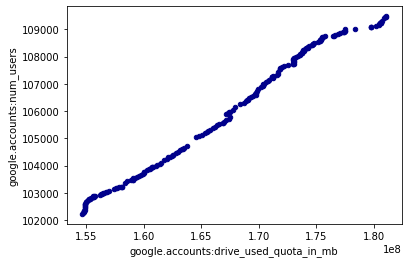

In [41]:
df.plot.scatter(x='google.accounts:drive_used_quota_in_mb',y='google.accounts:num_users',c='DarkBlue')

In [46]:
new_df = df.drop('google.accounts:drive_used_quota_in_mb',axis='columns')
new_df.fillna(new_df['google.accounts:num_users'].median())
new_df

,google.accounts:num_users
0,102230
1,102256
2,102295
3,102349
4,102336
...,...
229,109322
230,109409
231,109441
232,109464


In [49]:
mb = df.drop('google.accounts:num_users',axis='columns')
mb = mb.fillna(mb['google.accounts:drive_used_quota_in_mb'].median())
mb = mb['google.accounts:drive_used_quota_in_mb']
mb

0      154627215.0
1      154744887.0
2      154758434.0
3      154789797.0
4      154794265.0
          ...     
229    180751401.0
230    180860832.0
231    180993573.0
232    181083089.0
233    181105049.0
Name: google.accounts:drive_used_quota_in_mb, Length: 234, dtype: float64

In [50]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,mb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
data = {'users': [100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]}
users = pd.DataFrame(data=data)
users

,users
0,100000
1,150000
2,200000
3,250000
4,300000
5,350000
6,400000
7,450000
8,500000


In [59]:
p = reg.predict(users)
p

array([1.48108244e+08, 3.11887213e+08, 4.75666181e+08, 6.39445150e+08,
       8.03224119e+08, 9.67003088e+08, 1.13078206e+09, 1.29456103e+09,
       1.45833999e+09])

In [61]:
users['data_mb']=p
users

,users,data_mb
0,100000,1.481082e+08
1,150000,3.118872e+08
2,200000,4.756662e+08
3,250000,6.394452e+08
4,300000,8.032241e+08
5,350000,9.670031e+08
6,400000,1.130782e+09
7,450000,1.294561e+09
8,500000,1.458340e+09


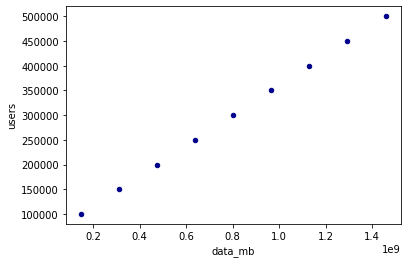

In [63]:
users.plot.scatter(y='users',x='data_mb',c='DarkBlue')